# Dose-Response Analysis of Sf9 Cells Exposed to Bacillus thuringiensis Insecticidal Protein

 This script visualizes the results of the dose-response analysis for Sf9 cells exposed to* Bacillus thuringiensis* insecticidal protein. It generates bar plots to compare the  normalized number of cells and normalized median area across different doses for  Protox and Toxin. Statistical significance is also indicated.


## Overview:
- Script created by Adan Guerrero (adan.guerrero@ibt.unam.mx).
- This script plot the dose-response relationship between cell conditions and exposure to the protein.
- It requires the `cell size.csv` `mortality.csv` and `IC50.csv` files generated by the script `240601_Dose_response_analysis.ipynb`.

## Input:
- Data from the dose-response analysis containing information on the concentration,normalized cell counts, median area, and statistical significance for Protox and Toxin.

## Output:
Bar plots comparing the effects of Protox and Toxin on cell number and median area.
A PDF file containing the generated plots.



## Dependencies:
- Python 3.x
- Libraries: `matplotlib`, `seaborn`, `pandas`
Install the required libraries via:
`pip install matplotlib seaborn pandas`

## Execution:
1. Ensure the input data from the dose-response analysis is available.
2. Run the script to generate and visualize the dose-response plots.
3. The plots will be saved as a PDF file and displayed in the output.

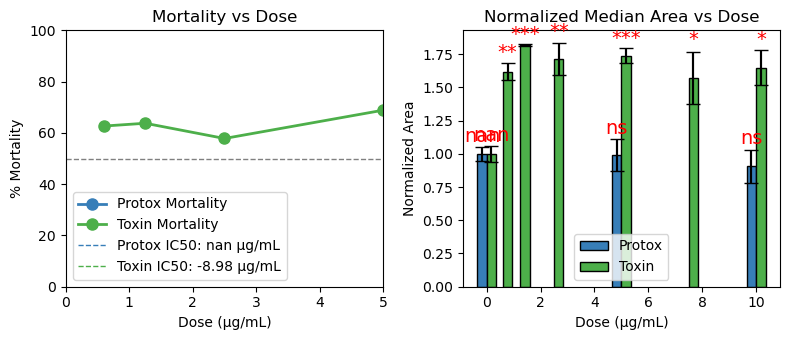

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn as sns
import os

####### Activate these lines to analyse Vip3Aa data
#folder_path = "Cry1Fa  toxin and protoxin/Joint analysis"
#protox_es = '72h Cry1Fa protoxin'
#toxin_es = '72h tox Cry1Fa'

####### Activate these lines to analyse Vip3Aa data
folder_path = "Vip3Aa toxin and protoxin/Joint analysis"
protox_es = '72h Vip3Aa Protox'
toxin_es = '72h Vip3Aa toxin'

# Define the path for the PDF file
pdf_file_path = os.path.join(folder_path, toxin_es + " dose plots.pdf")

# Load the data from the provided CSV files
protox_cell_size = pd.read_csv(os.path.join(folder_path, protox_es + ' cell size.csv'))
protox_mortality = pd.read_csv(os.path.join(folder_path, protox_es + " mortality.csv"))
protox_ic50 = pd.read_csv(os.path.join(folder_path, protox_es + ' IC50.csv'))

toxin_cell_size = pd.read_csv(os.path.join(folder_path, toxin_es + ' cell size.csv'))
toxin_mortality = pd.read_csv(os.path.join(folder_path, toxin_es + " mortality.csv"))
toxin_ic50 = pd.read_csv(os.path.join(folder_path, toxin_es + ' IC50.csv'))


# Extract the IC50 dose values
protox_ic50_dose = protox_ic50['IC50 Dose'].values[0]
toxin_ic50_dose = toxin_ic50['IC50 Dose'].values[0]

# Limit analysis to 20 µg/mL
protox_cell_size = protox_cell_size[protox_cell_size['Concentration'] <= 10]
toxin_cell_size = toxin_cell_size[toxin_cell_size['Concentration'] <= 10]
#protox_mortality = protox_mortality[protox_mortality['Dose'] <= 10]
toxin_mortality = toxin_mortality[toxin_mortality['Dose'] <= 10]

# Colors compatible with color blindness
protox_color = '#377eb8'  # Blue
toxin_color = '#4daf4a'   # Green

# Create a PDF file to save the plots
pdf = matplotlib.backends.backend_pdf.PdfPages(pdf_file_path)

# Create a figure with two subplots (panels A and B) for comparing Protox and Toxin
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5))

# Subplot A: Percentage Mortality vs Dose for Protox and Toxin (Linear Scale)
axs[0].plot(protox_mortality["Dose"], protox_mortality["Mortality"], 'o-', color=protox_color, linewidth=2, markersize=8, label='Protox Mortality')
axs[0].plot(toxin_mortality["Dose"], toxin_mortality["Mortality"], 'o-', color=toxin_color, linewidth=2, markersize=8, label='Toxin Mortality')
axs[0].axhline(y=50, color='gray', linestyle='--', linewidth=1)
axs[0].set_xlabel('Dose (µg/mL)')
axs[0].set_ylabel('% Mortality')
axs[0].set_title('Mortality vs Dose')
#axs[0].set_ylim(-15, 100)
#axs[0].set_xlim(0, 20)
axs[0].set_ylim(0, 100)
axs[0].set_xlim(0, 5)
axs[0].axvline(x=protox_ic50_dose, color=protox_color, linestyle='--', linewidth=1, label=f'Protox IC50: {protox_ic50_dose:.2f} µg/mL')
axs[0].axvline(x=toxin_ic50_dose, color=toxin_color, linestyle='--', linewidth=1, label=f'Toxin IC50: {toxin_ic50_dose:.2f} µg/mL')
axs[0].legend()

# Subplot B: Concentration vs Normalized Median Area for Protox and Toxin using matplotlib
bar_width = 0.35
bars_protox = axs[1].bar(protox_cell_size['Concentration'] - bar_width/2, protox_cell_size['mean'], color=protox_color, edgecolor='black', width=bar_width, yerr=protox_cell_size['sem'], capsize=5, label='Protox')
bars_toxin = axs[1].bar(toxin_cell_size['Concentration'] + bar_width/2, toxin_cell_size['mean'], color=toxin_color, edgecolor='black', width=bar_width, yerr=toxin_cell_size['sem'], capsize=5, label='Toxin')

# Add error bars and significance annotations for Protox
for i, bar in enumerate(bars_protox):
    x = bar.get_x() + bar.get_width() / 2  # Find the center of the bar
    y = bar.get_height()
    yerr = protox_cell_size['sem'][i]
    axs[1].errorbar(x, y, yerr=yerr, fmt='none', c='black')

    # Add significance annotation
    symbol = protox_cell_size['Significance'][i]
    axs[1].text(x, y + yerr * 1.1, symbol, ha='center', va='bottom', fontsize=14, color='red')

# Add error bars and significance annotations for Toxin
for i, bar in enumerate(bars_toxin):
    x = bar.get_x() + bar.get_width() / 2  # Find the center of the bar
    y = bar.get_height()
    yerr = toxin_cell_size['sem'][i]
    axs[1].errorbar(x, y, yerr=yerr, fmt='none', c='black')

    # Add significance annotation
    symbol = toxin_cell_size['Significance'][i]
    axs[1].text(x, y + yerr * 1.1, symbol, ha='center', va='bottom', fontsize=14, color='red')

axs[1].set_xlabel('Dose (µg/mL)')
axs[1].set_ylabel('Normalized Area')
axs[1].set_title('Normalized Median Area vs Dose')
axs[1].legend()


plt.tight_layout()

# Save the figure to the PDF
pdf.savefig(fig)

# Close the PDF file
pdf.close()

# Show the plots
plt.show()